In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [39]:
df = pd.read_csv("../../datasets/auto/auto-mpg.csv")

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [41]:
df.shape

(406, 9)

In [42]:
df = df.dropna()

In [43]:
df.shape

(392, 9)

Text(0.5,1,u'Relation')

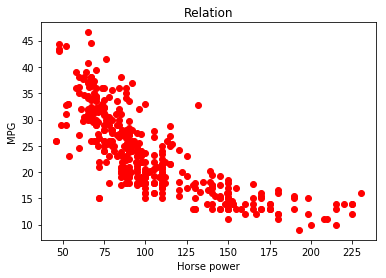

In [44]:
plt.plot(df["horsepower"],df["mpg"],"ro")
plt.xlabel("Horse power")
plt.ylabel("MPG")
plt.title("Relation")

## Create a linear model

In [45]:
X = df[["horsepower"]]
Y = df["mpg"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lm.score(X,Y)

0.6059482578894348

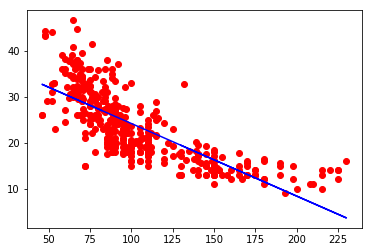

In [47]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X),color="blue")

In [48]:
SSD = np.sum((df["mpg"]-lm.predict(X))**2)
RSE = np.sqrt(RSE/(len(df)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
error

0.0006110804608908604

## Create a cuadractic model

In [49]:
X_cuad = X**2
lm_cuad = LinearRegression()
lm_cuad.fit(X_cuad,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
SSD = np.sum((df["mpg"]-lm.predict(X_cuad))**2)
RSE = np.sqrt(RSE/(len(df)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
error

0.0002581827342219241

## Create a linear and cuadractic model

In [55]:
poly = PolynomialFeatures(degree=2)
X_cuad = poly.fit_transform(X)
X_cuad

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [56]:
lm_new= linear_model.LinearRegression()
lm_new.fit(X_cuad,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lm_new.score(X_cuad,Y)

0.6875590305127516

## Create a model with n dimensions

In [70]:
def model_n_dimensions(dimensions):
    score = []
    for dimension in range(2,dimensions):
        poly = PolynomialFeatures(degree=dimension)
        X_data = poly.fit_transform(X)
        lm = linear_model.LinearRegression()
        lm.fit(X_data,Y)
        score.append(lm.score(X_data,Y))
    maxi = np.max(score)
    return maxi
model_n_dimensions(120)

0.6998050607960304